# Task 02: Warming Stripes in NRW



### Reading the annual temperature time series from the product files and merging them in a data frame

To start, the data from the 12 stations required was downloaded and separated  into 12 different folders, each one named after the zip files contained inside.
Then, they need to be read using pandas and transformed into dataframes. 

For this part I will also define a function so the code looks a little cleaner.

In [1]:
import pandas as pd
import datetime as dt

def df_norm(filename):
    dateparse = lambda dates: [dt.datetime.strptime(str(date), '%Y%m%d') for date in dates]

    df = pd.read_csv(filename, delimiter=";", encoding="cp1252", 
                     index_col="MESS_DATUM_BEGINN", 
                     parse_dates = ["MESS_DATUM_BEGINN", "MESS_DATUM_ENDE"], 
                     date_parser = dateparse, 
                     na_values = [-999.0, -999])
    
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    df.index.name = df.index.name.strip().lower().replace(' ', '_').replace('(', '').replace(')', '')
    df.index = df.index.tz_localize(tz ='UTC')
    
    return(df)


After the function is defined, it's time to store the path names for the files in some variables, as well as the file names themselves. The file for each station will be read separately at first. After the files are read and the dataframes created, the annual temperatures will be extracted from the dataframes and merged together into one bigger dataframe, with the respective station id as the column name.

**Station 1078:**

In [2]:
data_path_1078 = r"./data/jahreswerte_KL_01078_19400101_20201231_hist/"
data_file_1078 = r"produkt_klima_jahr_19400101_20201231_01078.txt"
file_path_1078 = data_path_1078 + data_file_1078
df_1078 = df_norm(file_path_1078)

**Station 1300:**

In [3]:
data_path_1300 = r"./data/jahreswerte_KL_01300_19310101_20201231_hist/"
data_file_1300 = r"produkt_klima_jahr_19310101_20201231_01300.txt"
file_path_1300 = data_path_1300 + data_file_1300
df_1300 = df_norm(file_path_1300)

**Station 1303:**

In [4]:
data_path_1303 = r"./data/jahreswerte_KL_01303_18880101_20201231_hist/"
data_file_1303 = r"produkt_klima_jahr_18880101_20201231_01303.txt"
file_path_1303 = data_path_1303 + data_file_1303
df_1303 = df_norm(file_path_1303)

**Station 1327:**

In [5]:
data_path_1327 = r"./data/jahreswerte_KL_01327_19370101_20201231_hist/"
data_file_1327 = r"produkt_klima_jahr_19370101_20201231_01327.txt"
file_path_1327 = data_path_1327 + data_file_1327
df_1327 = df_norm(file_path_1327)

**Station 1590:**

In [6]:
data_path_1590 = r"./data/jahreswerte_KL_01590_19370101_20201231_hist/"
data_file_1590 = r"produkt_klima_jahr_19370101_20201231_01590.txt"
file_path_1590 = data_path_1590 + data_file_1590
df_1590 = df_norm(file_path_1590)

**Station 2110:**

In [7]:
data_path_2110 = r"./data/jahreswerte_KL_02110_19380101_20201231_hist/"
data_file_2110 = r"produkt_klima_jahr_19380101_20201231_02110.txt"
file_path_2110 = data_path_2110 + data_file_2110
df_2110 = df_norm(file_path_2110)

**Station 2483:**

In [8]:
data_path_2483 = r"./data/jahreswerte_KL_02483_19290101_20201231_hist/"
data_file_2483 = r"produkt_klima_jahr_19290101_20201231_02483.txt"
file_path_2483 = data_path_2483 + data_file_2483
df_2483 = df_norm(file_path_2483)

**Station 2497:**

In [9]:
data_path_2497 = r"./data/jahreswerte_KL_02497_19370101_20201231_hist/"
data_file_2497 = r"produkt_klima_jahr_19370101_20201231_02497.txt"
file_path_2497 = data_path_2497 + data_file_2497
df_2497 = df_norm(file_path_2497)

**Station 2629:**

In [10]:
data_path_2629 = r"./data/jahreswerte_KL_02629_18510101_20201231_hist/"
data_file_2629 = r"produkt_klima_jahr_18510101_20201231_02629.txt"
file_path_2629 = data_path_2629 + data_file_2629
df_2629 = df_norm(file_path_2629)

**Station 2698:**

In [11]:
data_path_2698 = r"./data/jahreswerte_KL_02968_19030101_20201231_hist/"
data_file_2698 = r"produkt_klima_jahr_19030101_20201231_02968.txt"
file_path_2698 = data_path_2698 + data_file_2698
df_2698 = df_norm(file_path_2698)

**Station 4371:**

In [12]:
data_path_4371 = r"./data/jahreswerte_KL_04371_19310101_20201231_hist/"
data_file_4371 = r"produkt_klima_jahr_19310101_20201231_04371.txt"
file_path_4371 = data_path_4371 + data_file_4371
df_4371 = df_norm(file_path_4371)

**Station 5717:**

In [13]:
data_path_5717 = r"./data/jahreswerte_KL_05717_19070101_20201231_hist/"
data_file_5717 = r"produkt_klima_jahr_19070101_20201231_05717.txt"
file_path_5717 = data_path_5717 + data_file_5717
df_5717 = df_norm(file_path_5717)

Checking to see if the dataframes are being read properly by taking one example:

In [14]:
df_5717.head()

,stations_id,mess_datum_ende,qn_4,ja_n,ja_tt,ja_tx,ja_tn,ja_fk,ja_sd_s,ja_mx_fx,ja_mx_tx,ja_mx_tn,qn_6,ja_rr,ja_mx_rs,eor
mess_datum_beginn,,,,,,,,,,,,,,,,
1907-01-01 00:00:00+00:00,5717,1907-12-31,5.0,NaN,9.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,eor
1908-01-01 00:00:00+00:00,5717,1908-12-31,5.0,NaN,8.72,12.48,5.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,eor
1909-01-01 00:00:00+00:00,5717,1909-12-31,5.0,NaN,8.42,12.03,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,eor
1910-01-01 00:00:00+00:00,5717,1910-12-31,5.0,NaN,9.63,13.13,6.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,eor
1911-01-01 00:00:00+00:00,5717,1911-12-31,5.0,NaN,10.29,14.22,6.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,eor


According to the metadata files (specifically the one about the parameters, Metadaten_Parameter_klima_jahr), the yearly temperature column is **ja_tt**, so that is the one that needs to be extracted into a series.

For the extraction and renaming of the dataframe:

In [15]:
df_1078 = df_1078[['ja_tt']].rename(columns={'ja_tt': '1078'})
df_1300 = df_1300[['ja_tt']].rename(columns={'ja_tt': '1300'})
df_1303 = df_1303[['ja_tt']].rename(columns={'ja_tt': '1303'})
df_1327 = df_1327[['ja_tt']].rename(columns={'ja_tt': '1327'})
df_1590 = df_1590[['ja_tt']].rename(columns={'ja_tt': '1590'})
df_2110 = df_2110[['ja_tt']].rename(columns={'ja_tt': '2110'})
df_2483 = df_2483[['ja_tt']].rename(columns={'ja_tt': '2483'})
df_2497 = df_2497[['ja_tt']].rename(columns={'ja_tt': '2497'})
df_2629 = df_2629[['ja_tt']].rename(columns={'ja_tt': '2629'})
df_2698 = df_2698[['ja_tt']].rename(columns={'ja_tt': '2698'})
df_4371 = df_4371[['ja_tt']].rename(columns={'ja_tt': '4371'})
df_5717 = df_5717[['ja_tt']].rename(columns={'ja_tt': '5717'})

Testing if everything is correct:

In [16]:
df_1078.head()

,1078
mess_datum_beginn,
1940-01-01 00:00:00+00:00,8.82
1941-01-01 00:00:00+00:00,9.37
1942-01-01 00:00:00+00:00,9.28
1943-01-01 00:00:00+00:00,10.64
1944-01-01 00:00:00+00:00,10.10


Now that the dataframes have only the values needed, the next step is to merge them using an outer join:

In [17]:
df_tt = pd.concat([df_1078, df_1300,
                   df_1303, df_1327,
                   df_1590, df_2110,
                   df_2483, df_2497,
                   df_2629, df_2698,
                   df_4371, df_5717], 
                   axis=1)

Checking the dataframe:

In [18]:
df_tt.head()

,1078,1300,1303,1327,1590,2110,2483,2497,2629,2698,4371,5717
mess_datum_beginn,,,,,,,,,,,,
1851-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.73,NaN,NaN,NaN
1852-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.90,NaN,NaN,NaN
1853-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.89,NaN,NaN,NaN
1854-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.09,NaN,NaN,NaN
1855-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.34,NaN,NaN,NaN


As not every station has data since 1851 like station 2629, a correction in time frame is needed. There should be at least fifty years of data for each station, so, to adjust this in the dataframe, we need to limit it to data since 1970:

In [19]:
date_from = pd.to_datetime("1970-01-01 00:00:00+00:00")
date_to = pd.to_datetime("2020-01-01 00:00:00+00:00")

df_tt = df_tt[df_tt.index >= date_from]
df_tt = df_tt[df_tt.index <= date_to]

Checking:

In [20]:
df_tt.head()

,1078,1300,1303,1327,1590,2110,2483,2497,2629,2698,4371,5717
mess_datum_beginn,,,,,,,,,,,,
1970-01-01 00:00:00+00:00,9.76,7.11,9.28,9.22,9.48,9.57,4.38,6.97,9.55,10.37,8.69,8.86
1971-01-01 00:00:00+00:00,10.38,7.58,9.91,9.87,9.96,10.08,5.27,7.44,9.97,11.07,9.32,9.36
1972-01-01 00:00:00+00:00,9.80,6.98,9.23,9.23,9.40,9.43,4.59,6.88,9.14,10.42,8.77,8.76
1973-01-01 00:00:00+00:00,10.19,7.46,9.64,9.59,9.81,9.99,4.98,7.26,9.35,10.98,9.30,9.26
1974-01-01 00:00:00+00:00,10.68,7.93,9.95,10.25,10.20,10.41,5.08,7.57,9.71,11.32,9.82,9.70


### Creating the diagram with the dataframe

Plotting a diagram with line graphs for all 12 stations:

<AxesSubplot:title={'center':'Temperature Values in 12 Metheorological Stations Across NRW over 50 Years'}, xlabel='Measurement Timestamps', ylabel='Temperature in Celsius'>

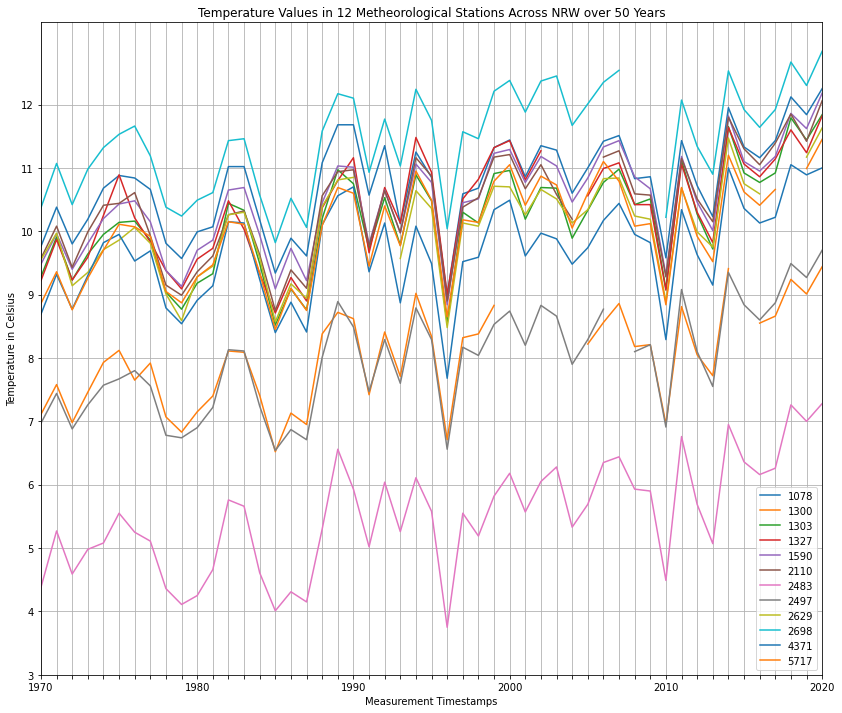

In [21]:
df_tt.plot.line(figsize=(14,12),
                grid=True,
                xticks=df_tt.index,
                yticks=pd.Series(range(3, 13)),
                title="Temperature Values in 12 Metheorological Stations Across NRW over 50 Years",
                xlabel="Measurement Timestamps",
                ylabel="Temperature in Celsius"
               )

As can be seen in the graph above, there are some missing values in some stations. For that, an interpolation method can be used, as to fill in those values in the dataframe and get a better idea of what the full graph would be.

<AxesSubplot:title={'center':'Temperature Values in 12 Metheorological Stations Across NRW over 50 Years'}, xlabel='Measurement Timestamps', ylabel='Temperature in Celsius'>

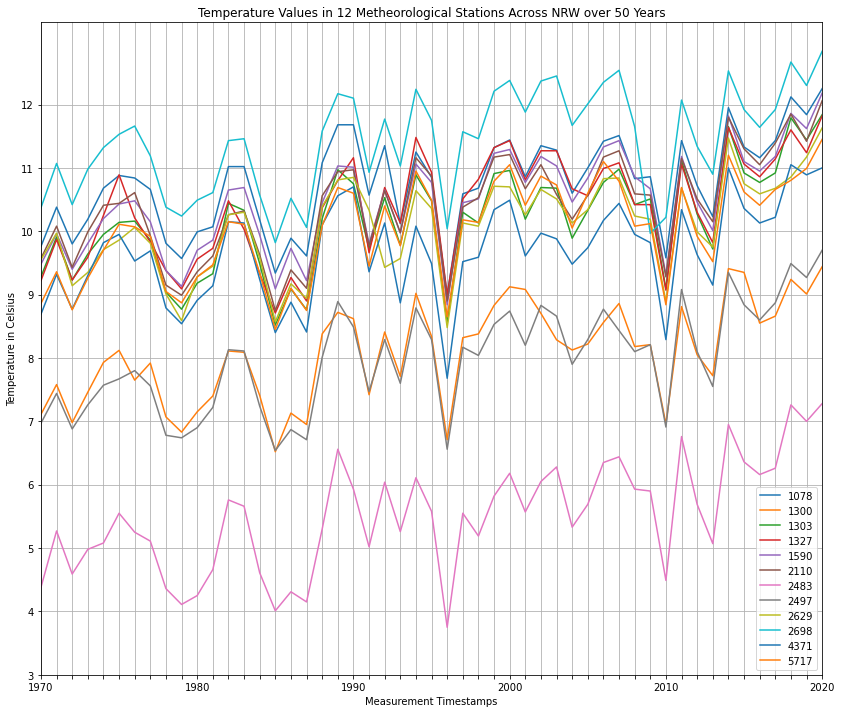

In [22]:
df_tt_temp = df_tt
df_tt_temp = df_tt_temp.interpolate(method='quadratic', limit_direction='backward')

df_tt_temp.plot.line(figsize=(14,12),
                     grid=True,
                     xticks=df_tt_temp.index,
                     yticks=pd.Series(range(3, 13)),
                     title="Temperature Values in 12 Metheorological Stations Across NRW over 50 Years",
                     xlabel="Measurement Timestamps",
                     ylabel="Temperature in Celsius"
                    )

### Comparison between stations 1303 and 2483

#### Question 1:

To compare only stations 1303 and 2483, a new dataframe with only the values from both of them needs to be created.

In [23]:
df_tt_comp = df_tt[['1303', '2483']]

Checking the data:

In [24]:
df_tt_comp.head()

,1303,2483
mess_datum_beginn,,
1970-01-01 00:00:00+00:00,9.28,4.38
1971-01-01 00:00:00+00:00,9.91,5.27
1972-01-01 00:00:00+00:00,9.23,4.59
1973-01-01 00:00:00+00:00,9.64,4.98
1974-01-01 00:00:00+00:00,9.95,5.08


Creating a line plot with both of them to better compare the temperature values:

<AxesSubplot:title={'center':'Temperature Comparison Between Stations 1303 and 2483'}, xlabel='Measurement Timestamps', ylabel='Temperature Values'>

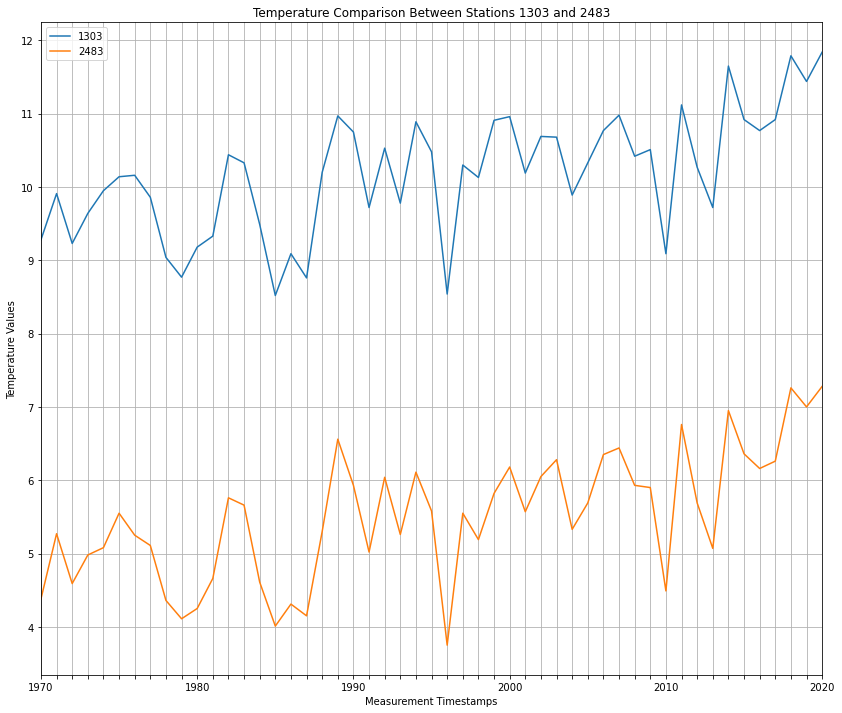

In [25]:
df_tt_comp.plot.line(figsize=(14,12),
                     grid=True,
                     xticks=df_tt_comp.index,
                     yticks=pd.Series(range(4, 13)),
                     title="Temperature Comparison Between Stations 1303 and 2483",
                     xlabel='Measurement Timestamps',
                     ylabel='Temperature Values',
                    )

With the analysis of this graph, it can be seen that the values for temperature in both these stations are in different temperature ranges, due to station 2483 being 700 meters above station 1303. With a station in a higher altitude, it is to be expected that the overall temperature values are lower than one on a lower altitude.

#### Question 2:

To plot the difference between the two data series, first there's the need to use diff() between the values of the two columns, then plot the results.

<AxesSubplot:title={'center':'Difference Between Values of Stations 1303 and 2483'}, xlabel='Measurement Timestamps', ylabel='Difference Values'>

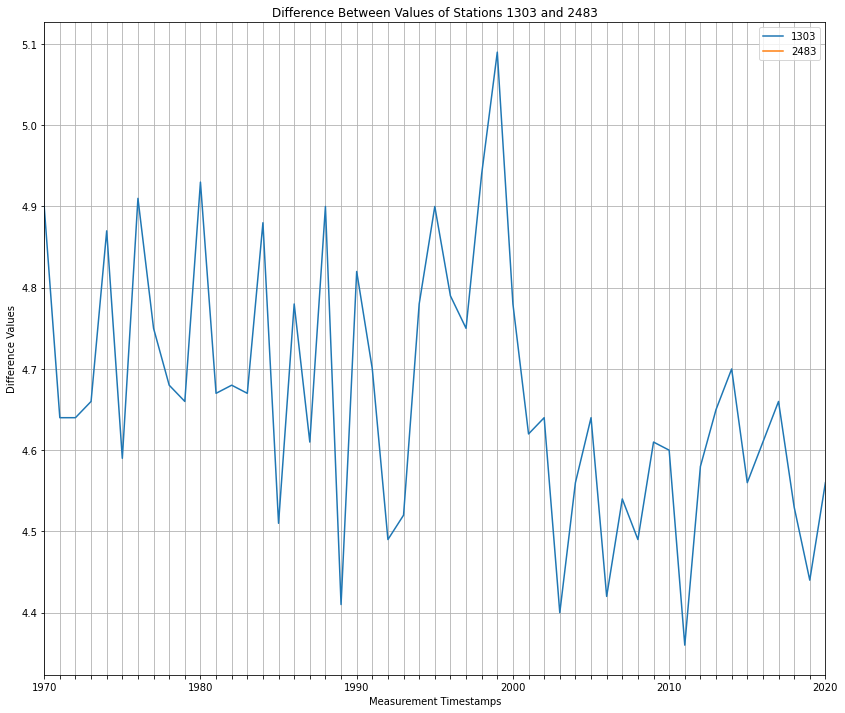

In [26]:
df_tt_comp.diff(periods=-1, axis=1).plot.line(figsize=(14,12),
                                  grid=True,
                                  xticks=df_tt_comp.index,
                                  title="Difference Between Values of Stations 1303 and 2483",
                                  xlabel='Measurement Timestamps',
                                  ylabel='Difference Values'
                                 )

Through the observation of this graph, it's seen that the difference between them has been decreasing since approximately the year 2000, clearly showing the effects of global warming in these areas. The two stations showed very similar curves, although in different temperature ranges; from 1999 to 2001 there is a considerable difference between the two values, then the curve shifts temperature range: instead of being between 4.9 and 4.5 (approximately), it goes down to 4.7 and 4.4, stabilising there. Observing the graph above this one, with both lines, it's visible that the reason for this is that the temperature in station 2483, located around 700 meters above station 1303, is increasing slightly more than the temperature in station 1303, even though both are increasing.

#### Question 3:

Now, plotting the values of station 1303 and 2483 as x axis and y axis, respectively:

P.S.: For reasons that I cannot explain, the labels are not showing properly. Considering that I tested this exact same code in Vscode and it worked fine, I assume it is a problem with the notebook itself.

<AxesSubplot:title={'center':'Comparison Between Stations 1303 and 2483'}, xlabel='1303', ylabel='2483'>

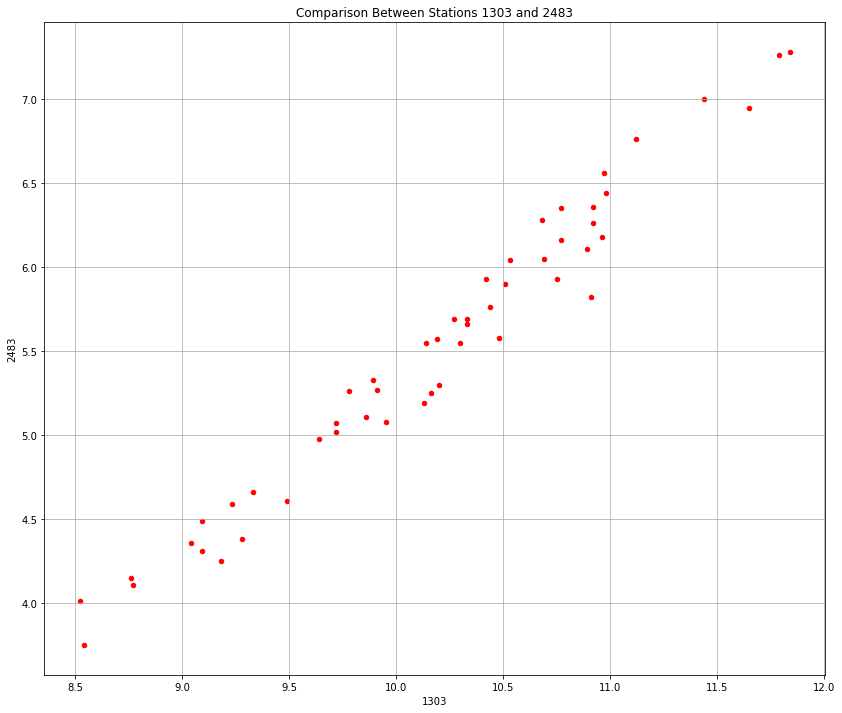

In [27]:
df_tt_comp.plot.scatter(figsize=(14,12),
                        grid=True,
                        x="1303",
                        y="2483",
                        title="Comparison Between Stations 1303 and 2483",
                        color="red",
                        xlabel="Station 1303",
                        ylabel="Station 2483"
                       )

Analysing the scatter plot, it shows that there's a very linear correlation between the values of the two stations, with very similar proportions of temperature increase.

### Analysing temperature difference relative to a reference temperature

To determine reference (average) values for all stations, first it's necessary to get the cumulative sum of each column of the dataframe, and taking the last value of each column (which represents the sum of every value). Then the cumulative sum can be divided by the length of the dataframe to get the average values.

In [28]:
avg_1078 = df_tt['1078'].cumsum().iloc[-1] / len(df_tt)
avg_1300 = df_tt['1300'].cumsum().iloc[-1] / len(df_tt)
avg_1303 = df_tt['1303'].cumsum().iloc[-1] / len(df_tt)
avg_1327 = df_tt['1327'].cumsum().iloc[-1] / len(df_tt)
avg_1590 = df_tt['1590'].cumsum().iloc[-1] / len(df_tt)
avg_2110 = df_tt['2110'].cumsum().iloc[-1] / len(df_tt)
avg_2483 = df_tt['2483'].cumsum().iloc[-1] / len(df_tt)
avg_2497 = df_tt['2497'].cumsum().iloc[-1] / len(df_tt)
avg_2629 = df_tt['2629'].cumsum().iloc[-1] / len(df_tt)
avg_2698 = df_tt['2698'].cumsum().iloc[-1] / len(df_tt)
avg_4371 = df_tt['4371'].cumsum().iloc[-1] / len(df_tt)
avg_5717 = df_tt['5717'].cumsum().iloc[-1] / len(df_tt)

With the average values stored, they can then be appended into a list:

In [29]:
avg_tt = [avg_1078, avg_1300,
          avg_1303, avg_1327,
          avg_1590, avg_2110,
          avg_2483, avg_2497,
          avg_2629, avg_2698,
          avg_4371, avg_5717
         ]

Checking if the list has all values:

In [30]:
avg_tt

[10.765490196078435,
 7.0617647058823545,
 10.181764705882353,
 9.941764705882354,
 10.482352941176467,
 10.199019607843134,
 5.513725490196078,
 7.82313725490196,
 9.259607843137253,
 10.999411764705881,
 9.680196078431374,
 9.821764705882355]

Now to create a new dataframe with the difference between the annual values and the average, I will use the sub() method, which subtracts every value in the dataframe by what is passed in the parameters:

In [31]:
df_diff = df_tt.sub(avg_tt)

Checking if the new dataframe contains the necessary data:

In [32]:
df_diff.head()

,1078,1300,1303,1327,1590,2110,2483,2497,2629,2698,4371,5717
mess_datum_beginn,,,,,,,,,,,,
1970-01-01 00:00:00+00:00,-1.00549,0.048235,-0.901765,-0.721765,-1.002353,-0.62902,-1.133725,-0.853137,0.290392,-0.629412,-0.990196,-0.961765
1971-01-01 00:00:00+00:00,-0.38549,0.518235,-0.271765,-0.071765,-0.522353,-0.11902,-0.243725,-0.383137,0.710392,0.070588,-0.360196,-0.461765
1972-01-01 00:00:00+00:00,-0.96549,-0.081765,-0.951765,-0.711765,-1.082353,-0.76902,-0.923725,-0.943137,-0.119608,-0.579412,-0.910196,-1.061765
1973-01-01 00:00:00+00:00,-0.57549,0.398235,-0.541765,-0.351765,-0.672353,-0.20902,-0.533725,-0.563137,0.090392,-0.019412,-0.380196,-0.561765
1974-01-01 00:00:00+00:00,-0.08549,0.868235,-0.231765,0.308235,-0.282353,0.21098,-0.433725,-0.253137,0.450392,0.320588,0.139804,-0.121765


Creating a scatter plot with all the differences:

<AxesSubplot:title={'center':'Temperature Difference over 50 Years in NRW'}, xlabel='Years', ylabel='Temperature Difference'>

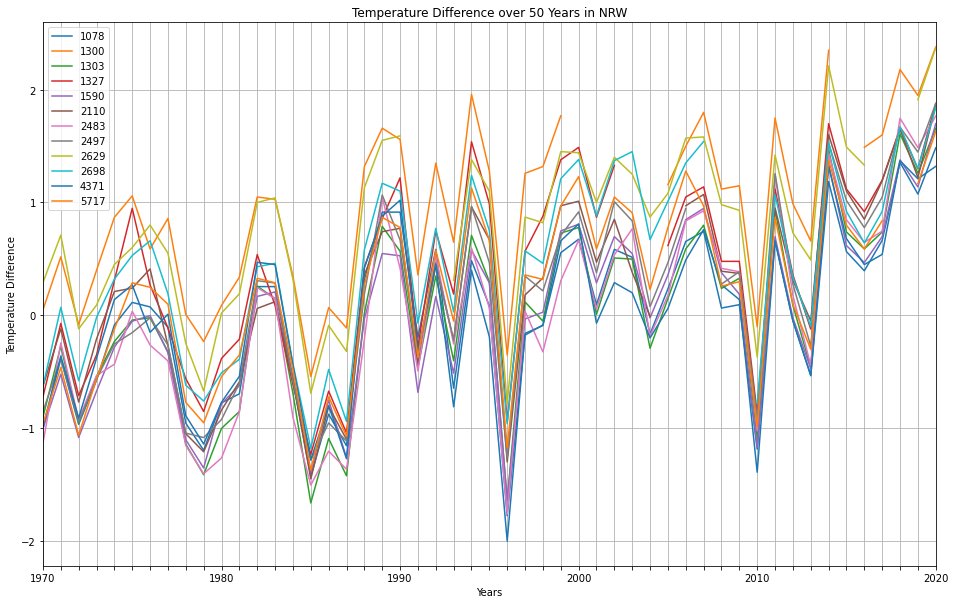

In [33]:
df_diff.plot.line(figsize=(16,10),
                  grid=True,
                  xticks=df_diff.index,
                  yticks=pd.Series(range(-2, 3)),
                  title="Temperature Difference over 50 Years in NRW",
                  xlabel="Years",
                  ylabel="Temperature Difference",
                 )

As was done with the other graphs, I will interpolate the graph to get a better view of the lines.

<AxesSubplot:title={'center':'Temperature Difference over 50 Years in NRW'}, xlabel='Years', ylabel='Temperature Difference'>

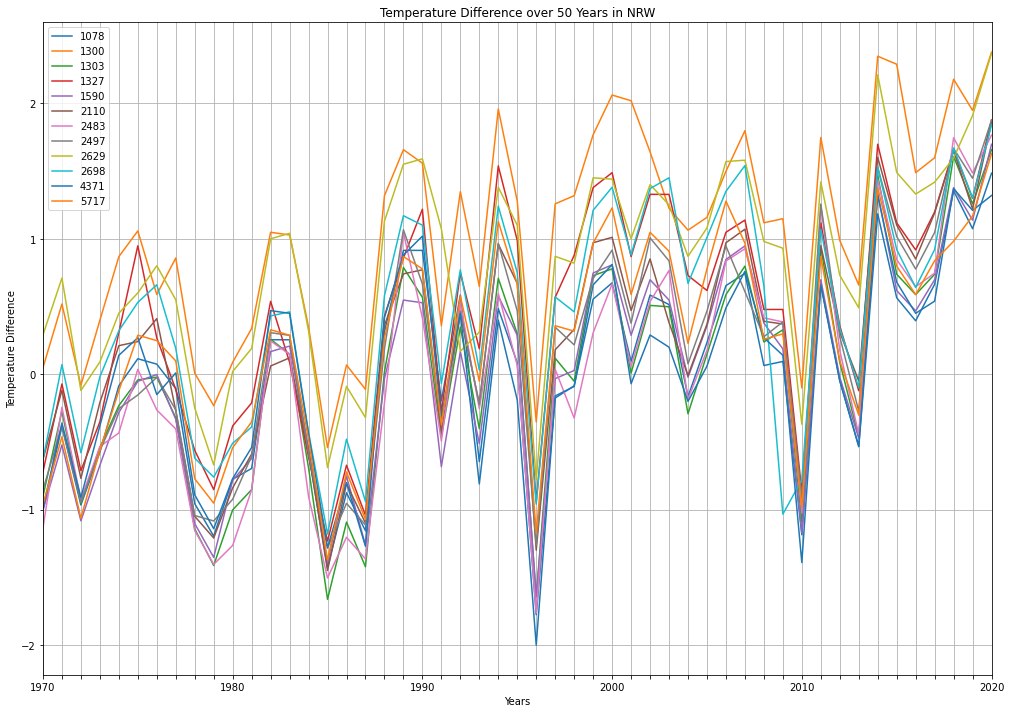

In [34]:
df_diff_temp = df_diff.interpolate(method='quadratic', limit_direction='backward')
df_diff_temp.plot.line(figsize=(17,12),
                  grid=True,
                  xticks=df_diff.index,
                  yticks=pd.Series(range(-2, 3)),
                  title="Temperature Difference over 50 Years in NRW",
                  xlabel="Years",
                  ylabel="Temperature Difference",
                 )

### Producing a heatmap

On to the final task, producing a heatmap of df_diff. To set the x and y axis correctly, df_diff.transpose() will be used. Also, I used a pandas series to set the names on the x axis because the full timestamps didn't really make sense, since we are analysing it year by year.

Text(141.0, 0.5, 'Station IDs')

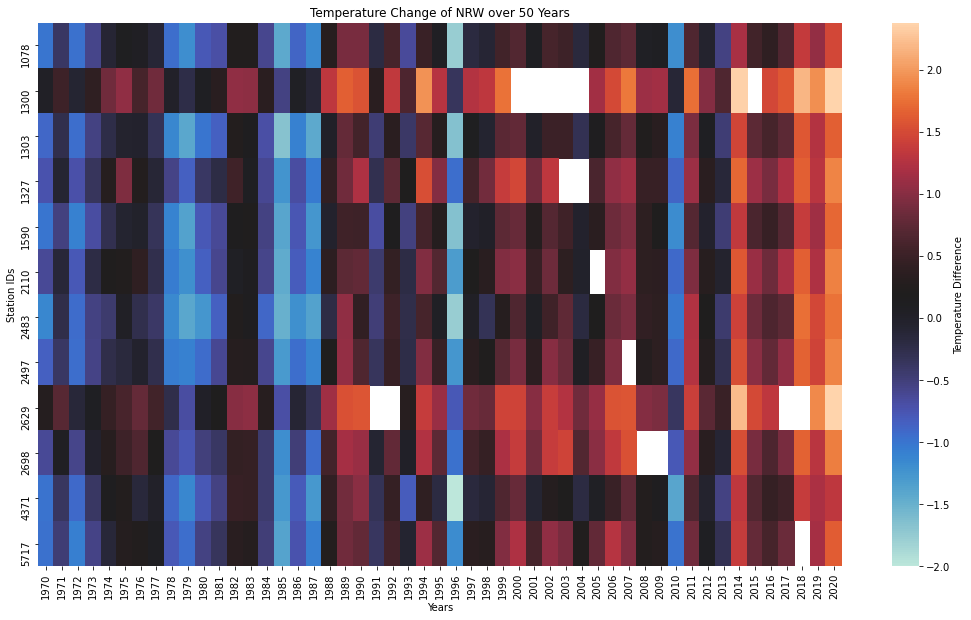

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


df_diff_trans = df_diff.transpose()
plt.figure(figsize=(18, 10))
sns.heatmap(df_diff_trans,
            xticklabels=pd.Series(range(1970, 2021)),
            cmap="icefire",
            cbar_kws={'label': 'Temperature Difference'}
           )

plt.title("Temperature Change of NRW over 50 Years")
plt.xlabel("Years")
plt.ylabel("Station IDs")

Interpolating the heatmap as well, to get a more complete view:

Text(141.0, 0.5, 'Station IDs')

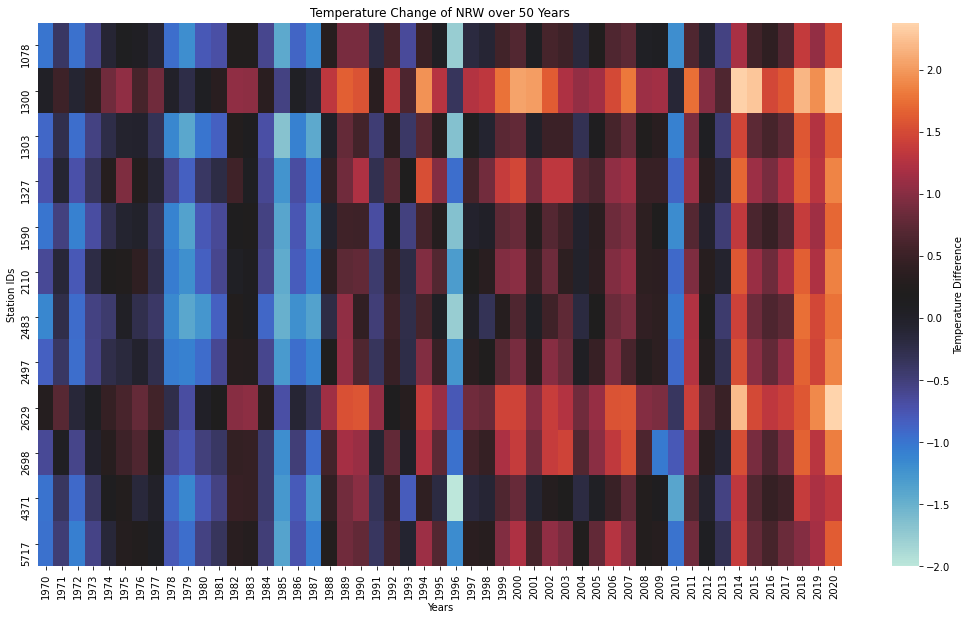

In [36]:
df_diff_temp = df_diff.interpolate(method='quadratic', limit_direction='backward').transpose()

plt.figure(figsize=(18, 10))
sns.heatmap(df_diff_temp,
            xticklabels=pd.Series(range(1970, 2021)),
            cmap="icefire",
            cbar_kws={'label': 'Temperature Difference'}
           )
plt.title("Temperature Change of NRW over 50 Years")
plt.xlabel("Years")
plt.ylabel("Station IDs")

In comparison to the warming stripes on a global scale, shown below:

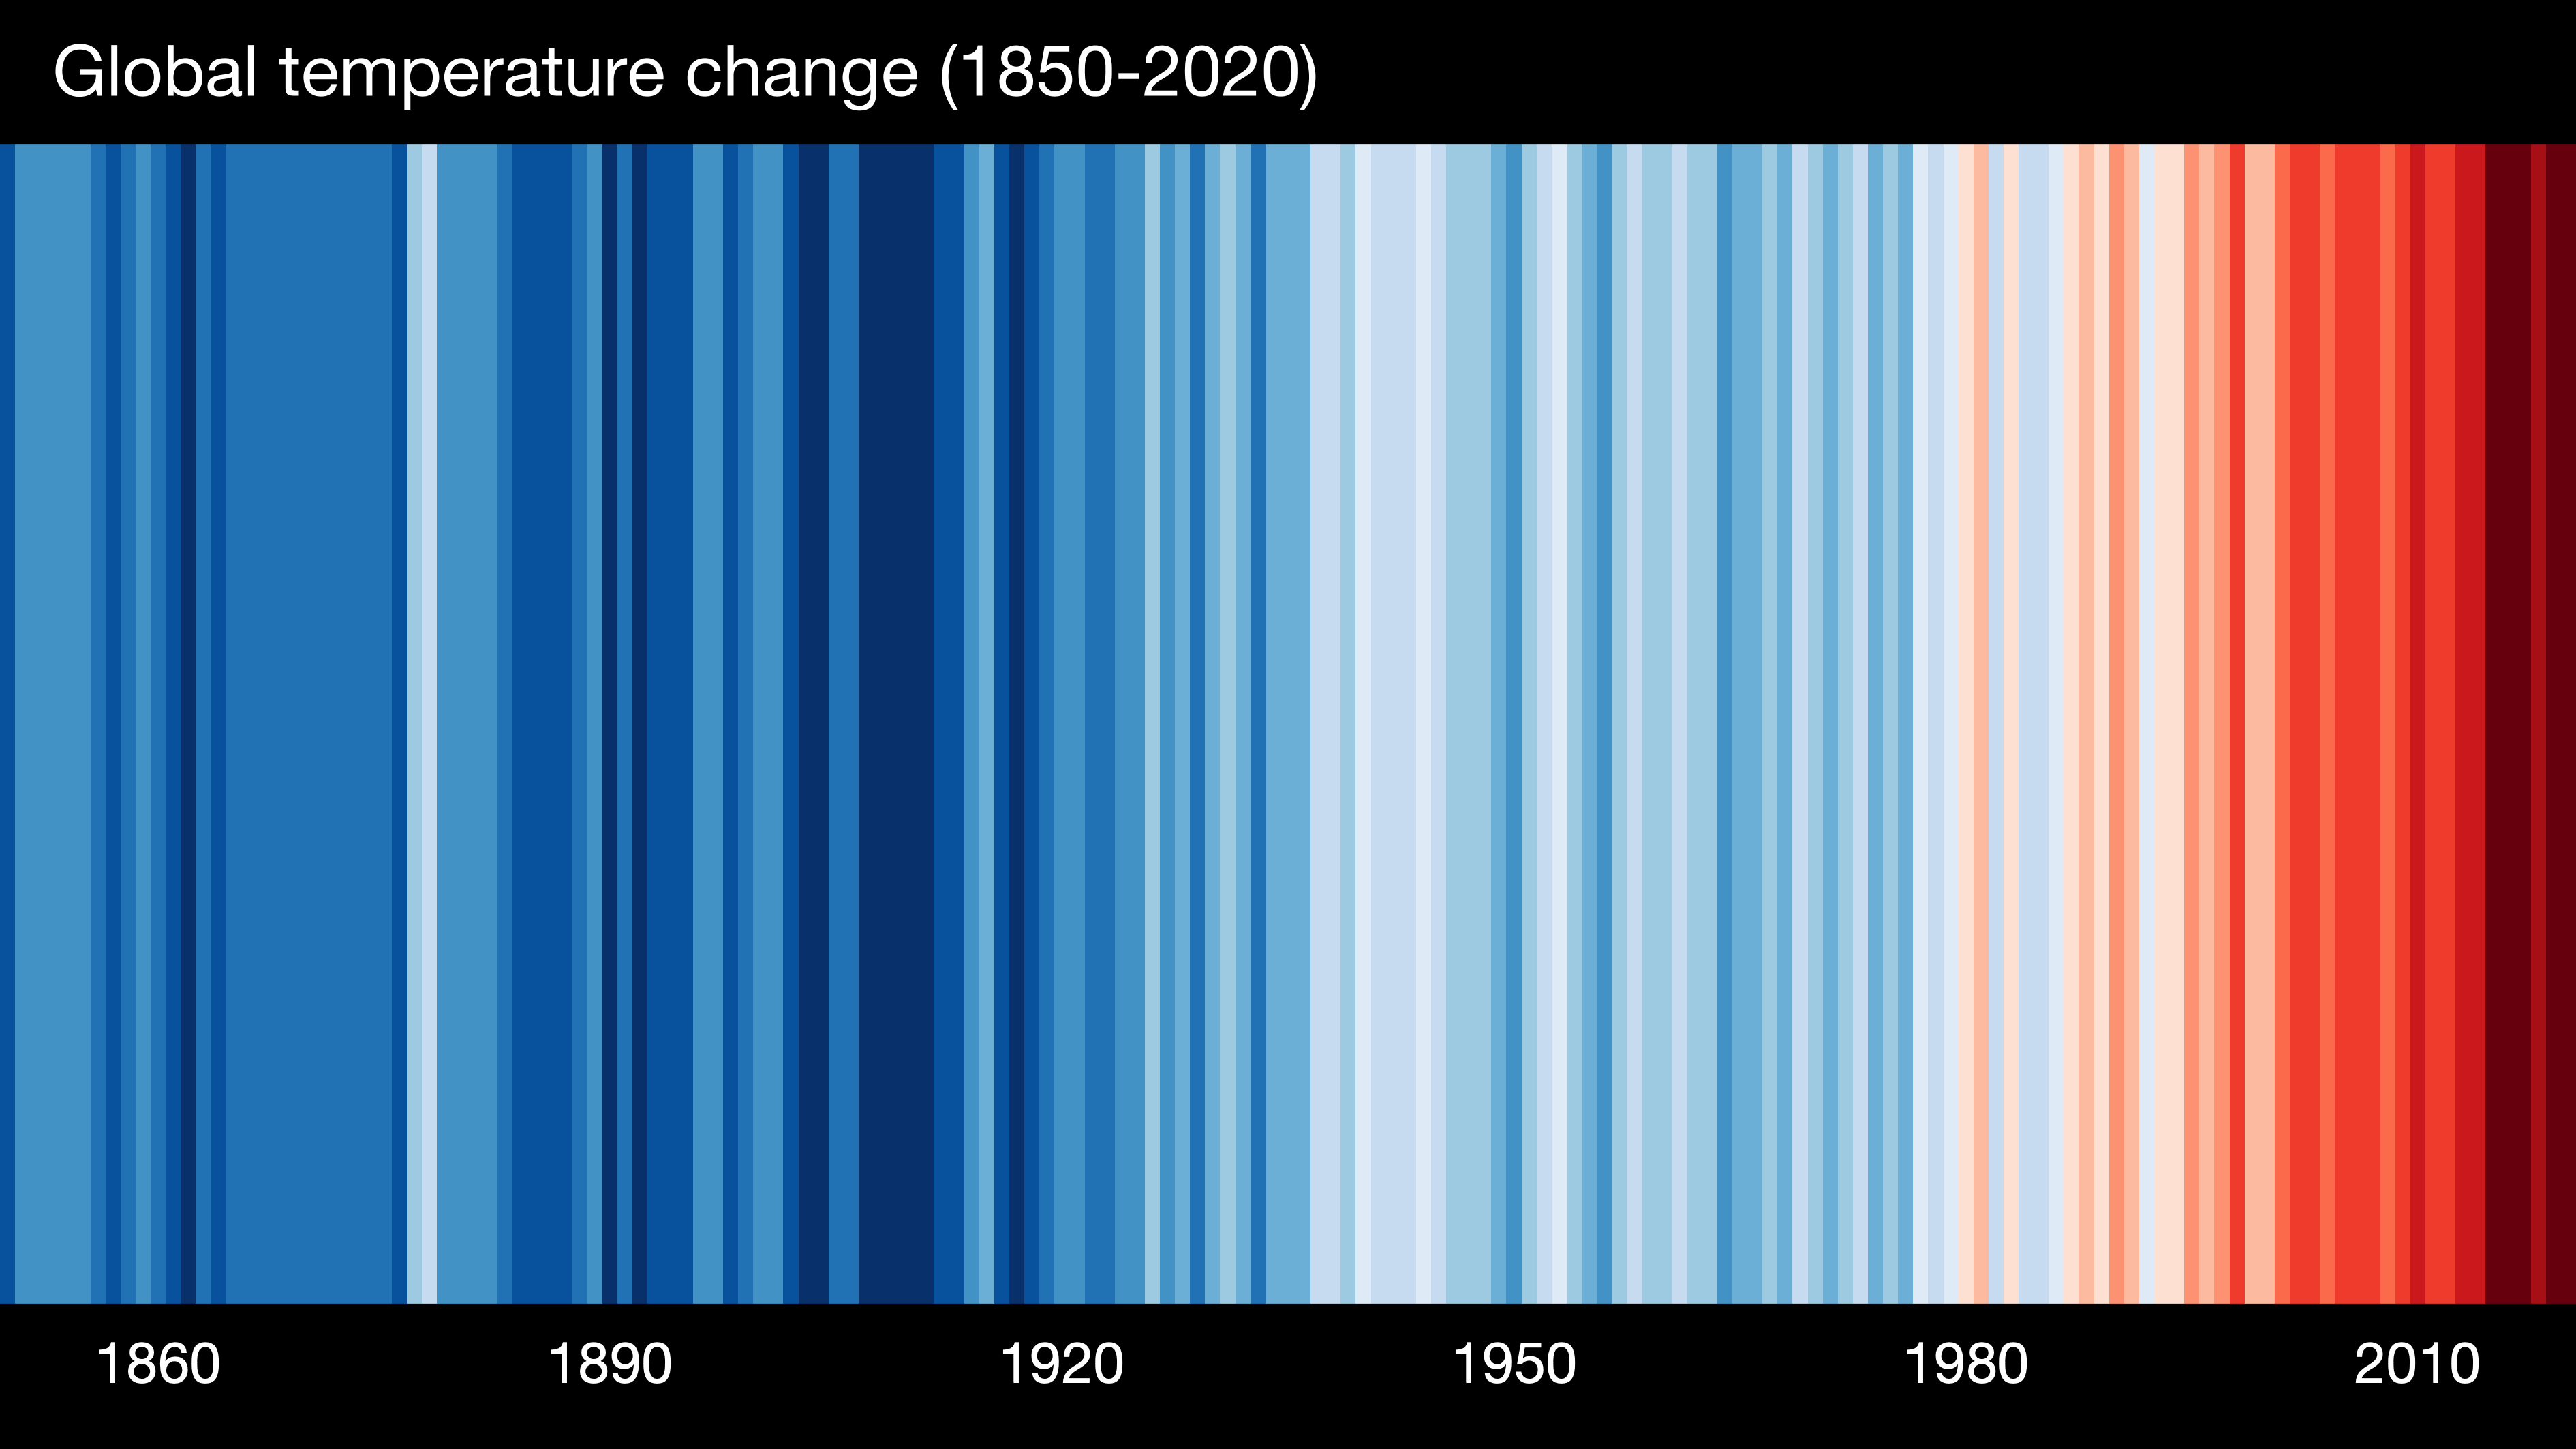

Comparing both heatmaps we can see that in the timeframe analysed (1970-2020) there is a very close similarity. Both maps show that a concerning warming is happening, at both local and global scales. In the global heatmap it can be seen that until 1930 there were no real changes in the temperature, it was stable. After that, the map starts to show a rise in temperature, but it is not until around 50 years ago that it starts to get alarmingly high. Around the year 2000, both maps show above average temperatures, having only a couple years in which the temperatures are below average, in the NRW map.